In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datetime import datetime as dt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/euroexport.csv',parse_dates=['time'])
bull = (data['close'].shift(1) < data['close'].shift(0))

for x in range(len(data)):
  if (bull.iloc[[x]].bool()):
    data.at[x,'dir'] = 1
  else:
    data.at[x,'dir'] = 0

for x in range(22):
  data['body'+str(x)] = (data['close'].shift(x) - data['open'].shift(x))  * 10000
  data['rsi'+str(x)] = data['rsi'].astype('float64').shift(x)

data['ma21'] = data['ma21'].astype('float64').round(4)
data['ma14'] = data['ma14'].astype('float64').round(4)
data['dow'] = data['time'].dt.dayofweek
data['hour'] = data['time'].dt.hour

data = data.dropna()
x_train = data.drop(columns=['dir','time','rsi','spread']).iloc[0:-500]
y_train = data['dir'].iloc[0:-500]

train, test , trainLabel, testLabel = train_test_split(x_train, y_train, test_size = .25)

ModuleNotFoundError: No module named 'pandas'

# New Section

In [ ]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

model = get_compiled_model()
history = model.fit(train, trainLabel, epochs=7,validation_data= (test,testLabel))

Epoch 1/7
2914/2914 [==============================] - 5s 1ms/step - loss: 2.0659 - accuracy: 0.8043 - val_loss: 0.2818 - val_accuracy: 0.9405
Epoch 2/7
2914/2914 [==============================] - 4s 1ms/step - loss: 0.5985 - accuracy: 0.9159 - val_loss: 0.1751 - val_accuracy: 0.9539
Epoch 3/7
2914/2914 [==============================] - 4s 1ms/step - loss: 0.3160 - accuracy: 0.9318 - val_loss: 0.1962 - val_accuracy: 0.9128
Epoch 4/7
2914/2914 [==============================] - 4s 1ms/step - loss: 0.2286 - accuracy: 0.9285 - val_loss: 0.1249 - val_accuracy: 0.9627
Epoch 5/7
2914/2914 [==============================] - 4s 1ms/step - loss: 0.1480 - accuracy: 0.9434 - val_loss: 0.1251 - val_accuracy: 0.9613
Epoch 6/7
2914/2914 [==============================] - 4s 1ms/step - loss: 0.1419 - accuracy: 0.9460 - val_loss: 0.1362 - val_accuracy: 0.9587
Epoch 7/7
2914/2914 [==============================] - 4s 1ms/step - loss: 0.1307 - accuracy: 0.9488 - val_loss: 0.1146 - val_accuracy: 0.9553

In [ ]:
model.evaluate(test,testLabel)

972/972 [==============================] - 1s 694us/step - loss: 0.1146 - accuracy: 0.9553


[0.11460118740797043, 0.9552680850028992]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


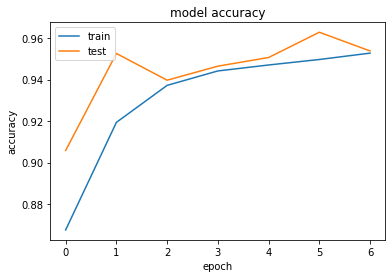

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

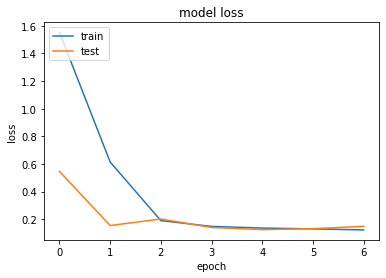

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
preds = (model.predict(data.drop(columns=['dir','time','rsi','spread']).iloc[-500:-1]) > .5).astype("int32")
loss = 0
for aa in range(len(preds)):
    print(preds[aa][0], data['dir'].iloc[-500 + aa])
    if preds[aa][0] != data['dir'].iloc[-500 + aa]:
        loss +=1
print(loss)

0 0.0
1 1.0
0 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 1.0
1 1.0
0 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 1.0
0 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.

In [ ]:
import numpy as np
preds = (model.predict(data.drop(columns=['dir','time','rsi','spread']).iloc[-20:-1]) > .5).astype("int32")
print(preds)
print(data['dir'].iloc[-20:-1])

[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
124795    0.0
124796    0.0
124797    1.0
124798    1.0
124799    0.0
124800    1.0
124801    0.0
124802    1.0
124803    0.0
124804    0.0
124805    1.0
124806    1.0
124807    1.0
124808    1.0
124809    0.0
124810    0.0
124811    1.0
124812    0.0
124813    0.0
Name: dir, dtype: float64
